In [1]:
# Import all required packages

import gym
import numpy as np
from matplotlib import pyplot as plt
import argparse
import multiprocessing as mp
import warnings
import options
from tqdm import tqdm
warnings.simplefilter('ignore')
from algo import SMDPQ
import matplotlib.pyplot as plt
from operator import add
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

In [2]:
# Creating an instance of the class SMDPQ

ql = SMDPQ()

In [4]:
# Initialize parameters

gamma = 0.9
alpha = 0.1
epsilon = 0.1
num_episodes = 1000
intra = True
goal = 'G1'
initial_room = 1

In [5]:
# Averaging over different instances 

def average():
    rewards, num_steps, Q = ql.episode_run(gamma, alpha, epsilon, initial_room, goal, num_episodes, intra, gym.make('FourRooms-v0'))
    for i in tqdm(range(2,102)):
        rewards_, num_steps_, Q_ = ql.episode_run(gamma, alpha, epsilon, initial_room, goal, num_episodes, intra, gym.make('FourRooms-v0'))
        for j in range(len(rewards)):
            rewards[j] = rewards[j] + (rewards_[j] - rewards[j])/i
            num_steps[j] = num_steps[j] + (num_steps_[j] - num_steps_[j])/i
        for l in range(len(Q)):
            for m in range(len(Q[l])):
                for n in range(len(Q[l,m])):
                    Q[l,m,n] = Q[l,m,n] + (Q_[l,m,n] - Q[l,m,n])/i
            
    return rewards, num_steps, Q

In [6]:
rewards, num_steps, Q = average()

100%|██████████| 100/100 [00:22<00:00,  4.42it/s]


Text(0, 0.5, 'Episodic return (G$_t$)')

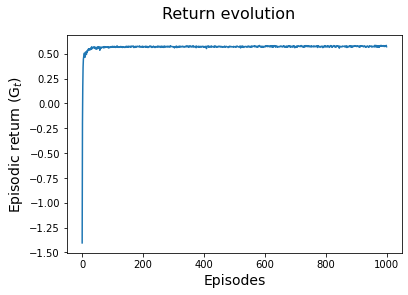

In [7]:
fig = plt.figure()
fig.suptitle('Return evolution', fontsize = 16)
plt.plot(rewards)
plt.xlabel('Episodes', fontsize = 14)
plt.ylabel('Episodic return (G$_t$)', fontsize = 14)

Text(0, 0.5, 'Average no. of steps')

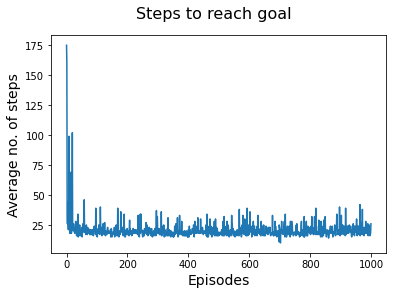

In [8]:
fig = plt.figure()
fig.suptitle('Steps to reach goal', fontsize = 16)
plt.plot(num_steps)
plt.xlabel('Episodes', fontsize = 14)
plt.ylabel('Average no. of steps', fontsize = 14)

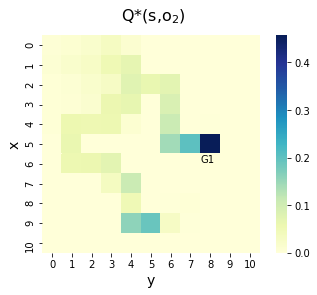

In [10]:
#Plotting heat map of the Q function

#a1,a2,a3,a4,o1,o5 = [0,1,2,3,4,5]
fig = plt.figure()
fig.suptitle('Q$*$(s,o$_2$)', fontsize = 16)
ax = sns.heatmap(Q[:,:,5], square=True,  cmap="YlGnBu")
ax.text(8, 6, 'G1', horizontalalignment='left', verticalalignment='top')
plt.xlabel('y', fontsize = 14)
plt.ylabel('x', fontsize = 14)
plt.show()

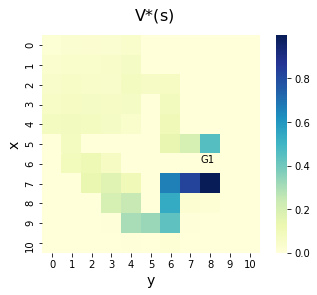

In [11]:
#Plotting heat map of the value function

fig = plt.figure()
fig.suptitle('V$*$(s)', fontsize = 16)
ax = sns.heatmap(np.amax(Q,axis = 2), square=True,  cmap="YlGnBu")
ax.text(8, 6, 'G1', horizontalalignment='left', verticalalignment='top')
plt.xlabel('y', fontsize = 14)
plt.ylabel('x', fontsize = 14)
plt.show()

In [12]:
### PLOTTING 3D VALUE FUNCTION ....

def plot_valuefn():
    x = np.linspace(0, 10, 11)
    y = np.linspace(0, 10, 11)
    X, Y = np.meshgrid(x, y)
    Z = np.amax(Q, axis = 2)
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot_surface(X, Y, Z, edgecolor='none')
    ax.set_title('Optimal value function')
    plt.show()

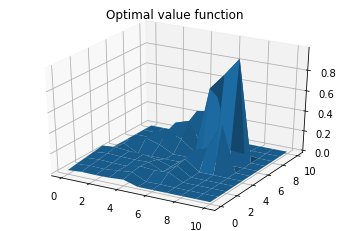

In [13]:
plot_valuefn()